<a href="https://colab.research.google.com/github/karegapauline/Projects/blob/master/BHKi_proj/HPC_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

High-performance computing (HPC) is increasingly central to modern bioinformatics, genomics, public health, and environmental research. In Africa, growing participation in large-scale data-driven initiatives such as H3Africa has catalyzed investments in institutional and national HPC infrastructure. However, despite the presence of multiple HPC systems across the continent, evidence suggests persistent underutilization, restricted access, and misalignment between available computational resources and researcher needs.

We sort to investigate the extent of this situation by exploring existing grey and peer reviewed literature in Africa. The goal of this is to co-design a framework that would strengthen collaboration between regions that have particular strengths and weaknesses, and would benefit from collaboration.

## Method

1. Exploring grey and peer-reviewed literature

We scraped the websites for articles and information that related to High Performance computing infrastructure in Africa. We then manually explored information on their capacity, user accessibility, and training.

In [ ]:
pip install serpapi requests pandas tqdm

In [ ]:
import requests
import pandas as pd
from tqdm import tqdm

# ---------------- CONFIGURATION ----------------
SERPAPI_KEY = "084d87bb4b76b4a41d75b649eea9146c2aed325d1f5fbfa725dec24fd748bda3"

# Search focus
keywords = [
    "High Performance Computing Africa",
    "HPC bioinformatics Kenya",
    "HPC infrastructure Ghana",
    "HPC cluster Nigeria",
    "High Performance Computing Tanzania",
    "Supercomputing South Africa",
]

regions = ["Kenya", "Tanzania", "Ghana", "Nigeria", "South Africa"]

# Storage
records = []

# ---------------- FUNCTIONS ----------------
def search_grey_literature(query):
    """Use SerpAPI to pull URLs from Google for reports, PDFs, and institutional pages."""
    url = "https://serpapi.com/search.json"
    params = {
        "engine": "google",
        "q": query + " filetype:pdf OR site:.org OR site:.edu OR site:.ac.za",
        "api_key": SERPAPI_KEY,
        "num": 10,
    }
    r = requests.get(url, params=params)
    data = r.json()
    results = []
    for item in data.get("organic_results", []):
        results.append({
            "title": item.get("title"),
            "link": item.get("link"),
            "snippet": item.get("snippet"),
            "source": "Grey Literature"
        })
    return results


def search_crossref(query):
    """Query Crossref for academic publications."""
    url = f"https://api.crossref.org/works?query={query}&rows=10"
    r = requests.get(url)
    data = r.json()
    results = []
    for item in data.get("message", {}).get("items", []):
        results.append({
            "title": item.get("title", [""])[0],
            "link": item.get("URL"),
            "snippet": item.get("abstract", ""),
            "source": "Crossref"
        })
    return results


def search_semanticscholar(query):
    """Query Semantic Scholar for academic papers."""
    url = f"https://api.semanticscholar.org/graph/v1/paper/search?query={query}&limit=10&fields=title,url,abstract"
    r = requests.get(url)
    data = r.json()
    results = []
    for item in data.get("data", []):
        results.append({
            "title": item.get("title"),
            "link": item.get("url"),
            "snippet": item.get("abstract"),
            "source": "Semantic Scholar"
        })
    return results


# ---------------- MAIN LOOP ----------------
for kw in tqdm(keywords):
    try:
        grey = search_grey_literature(kw)
        cross = search_crossref(kw)
        sem = search_semanticscholar(kw)
        all_results = grey + cross + sem
        for r in all_results:
            r["query"] = kw
            records.append(r)
    except Exception as e:
        print(f"Error with {kw}: {e}")

# ---------------- OUTPUT ----------------
df = pd.DataFrame(records)
df.drop_duplicates(subset=["link"], inplace=True)
df.to_csv("HPC_literature_Africa.csv", index=False)

print(f"✅ Collected {len(df)} unique records. Saved to HPC_literature_Africa.csv.")


100%|██████████| 6/6 [00:06<00:00,  1.07s/it]

✅ Collected 106 unique records. Saved to HPC_literature_Africa.csv.


## Summary of findings
We obtained 106 records of grey literature and peer reviewed articles from South Africa, Kenya, Tanzania, Ghana and Nigeria. We keot material that detailed high performance computing use, summaries, availability, and existence. We discovered that using 'HPC' as a keyword was not the best strategy for Nigeria where the term was dorminantly used to abbreviate 'Humanitarian Programme Cycle', rather than 'High Performance Computing'.

Using our inclusion criteria, we retained 16 articles. Which we looked to indepth. 3 articles talked about the HPC ecosystem in Africa and its growth. In the Ten Years of HPC ecosystem project paper, Johnston et al detailed the work done over the decade to grow the HPC workforce, especially for the Square Kilometer Array project and cyber security infrastructure in Saouth Africa. The project run since 2013 has deployed 35 HPC systems in 11 countries and conducted multiple training workshops.  

## Visualizing results

The following are visualizations about HPC locations, capacity and access in Africa.

In [ ]:
pip install geodatasets


In [ ]:
import geodatasets
import geopandas as gpd
#geodatasets.get_path("naturalearth.countries")

world = gpd.read_file('/content/drive/MyDrive/BHKI-Vault/2025/HPC_use_proj /ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Admin-0 country,1,3,Afghanistan,AFG,0,2,Sovereign country,1,Afghanistan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((66.52227 37.34849, 66.82773 37.37129..."
238,Admin-0 country,1,5,Kashmir,KAS,0,2,Indeterminate,None,Siachen Glacier,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((77.04863 35.10991, 77.00449 35.19634..."
239,Admin-0 country,3,4,Antarctica,ATA,0,2,Indeterminate,1,Antarctica,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-45.71777 -60.5209, -45.49971 ..."
240,Admin-0 country,3,6,Netherlands,NL1,1,2,Country,1,Sint Maarten,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-63.12305 18.06895, -63.01118 18.068..."


In [ ]:
## code to put countries into continents
# Filter for African countries.
# Since there is no "continent" column, we define a list of country names
# within Africa to filter the dataset.
import pandas as pd

africa_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
    "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea",
    "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea",
    "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya",
    "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
    "Mozambique", "Namibia", "Niger", "Nigeria", "Republic of the Congo",
    "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone",
    "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo",
    "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]

# Filter using the 'NAME' column or 'SOVEREIGNT' column in 50m data
africa = world[world['NAME'].isin(africa_countries)].copy()
africa =africa.to_crs(epsg=4326)

## The HPC systems that exist

data = [
    ("ZA-Wits-Core", "South Africa", 1348, -26.1929, 28.0305),
    ("CHPC", "South Africa", 32832, -33.9249, 18.4241),
    ("Ilifu", "South Africa", 1856, -33.9570, 18.4607),
    ("UCT HPC", "South Africa", 960, -33.9570, 18.4607),

    ("Discovery", "Ghana", 288, 6.6745, -1.5716),

    ("Virtual Lab - KENET", "Kenya", 176, -1.2921, 36.8219),
    ("Hpc01", "Kenya", 64, -1.2223, 36.8919),
    ("PUBReC", "Kenya", 16, -3.4905, 39.8440),
    ("ILRI", "Kenya", 128, -1.2706, 36.7240),
    ("Dar es Salaam Institute of Technology India - Tanzania Centre of Excellence in ICT (ITCoEICT)", "Tanzania", )

    ("UVRI Bioinformatics Cluster", "Uganda", 32, 0.0436, 32.4600),

    ("Pathogens Biology", "Malawi", 56, -15.7861, 35.0058),

    ("IPT", "Tunisia", 72, 36.8065, 10.1815),

    ("CUBRe", "Nigeria", 64, 6.6719, 3.1581),
    ("NABDA-CGRI", "Nigeria", 8, 9.0579, 7.4951),

    ("ECBAG-EGYPT", "Egypt", 24, 30.5877, 31.5020),
]

df = pd.DataFrame(
    data,
    columns=["name", "country", "cores", "lat", "lon"]
)

gdf_points = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lon, df.lat),
    crs="EPSG:4326"
)



In [ ]:
df

,name,country,cores,lat,lon
0,ZA-Wits-Core,South Africa,1348,-26.1929,28.0305
1,CHPC,South Africa,32832,-33.9249,18.4241
2,Ilifu,South Africa,1856,-33.9570,18.4607
3,UCT HPC,South Africa,960,-33.9570,18.4607
4,Discovery,Ghana,288,6.6745,-1.5716
5,Virtual Lab - KENET,Kenya,176,-1.2921,36.8219
6,Hpc01,Kenya,64,-1.2223,36.8919
7,PUBReC,Kenya,16,-3.4905,39.8440
8,ILRI,Kenya,128,-1.2706,36.7240
9,UVRI Bioinformatics Cluster,Uganda,32,0.0436,32.4600



### 1. Capacity in Africa

South Africa dominates in terms of the number of cores, storage capacity (TB-PB scale) compared to other countries. It serves universities and industry.  

East Africa has fewer HPCs with less cores. Literature points to existing infrastructure in Tanzania, Kenya, Ethiopia, and Uganda. Information about the

West africa have small to midsize clusters with limited storage and often operating as single institutions.

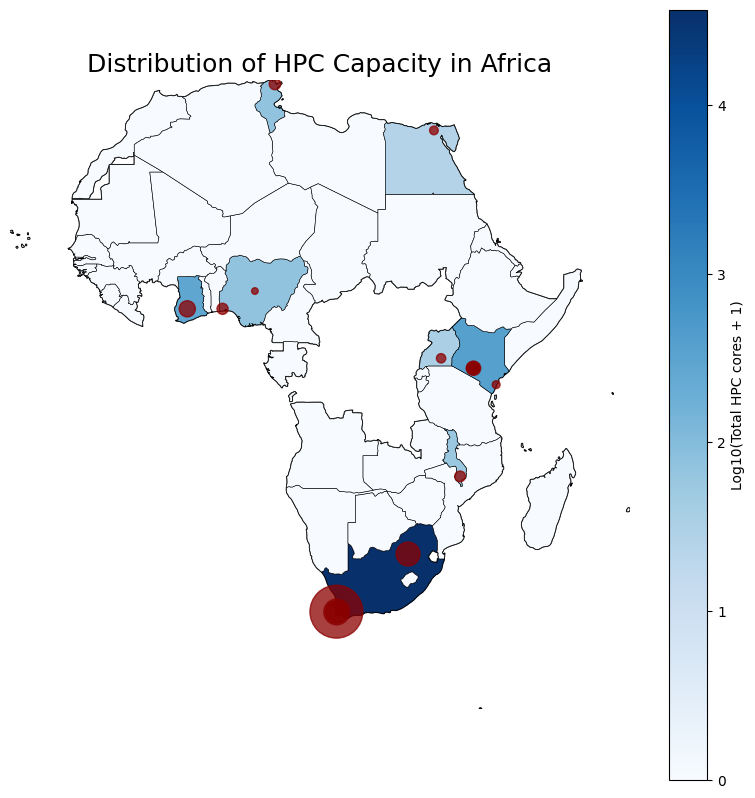

In [ ]:
import matplotlib.pyplot as plt

country_capacity = (
    gdf_points
    .groupby("country", as_index=False)
    .agg(
        total_cores=("cores", "sum"),
        hpc_sites=("name", "count")
    )
)

africa = africa.merge(
    country_capacity,
    how="left",
    left_on="NAME",
    right_on="country"
)


africa["total_cores"] = africa["total_cores"].fillna(0)

import numpy as np

africa["log_total_cores"] = np.log10(africa["total_cores"] + 1)
gdf_points["scaled_cores"] = np.sqrt(gdf_points["cores"])

#fig, ax = plt.subplots(1, 1, figsize=(14, 14))

ax = africa.plot(figsize=(10, 10), color="whitesmoke", edgecolor="black")

africa.plot(
    ax=ax,
    column="log_total_cores",
    cmap="Blues",
    legend=True,
    edgecolor="black",
    linewidth=0.4,
    legend_kwds={"label": "Log10(Total HPC cores + 1)"}
)

# Force correct extent (critical)
ax.set_xlim(africa.total_bounds[[0, 2]])
ax.set_ylim(africa.total_bounds[[1, 3]])


# Site-level capacity bubbles
gdf_points.plot(
    ax=ax,
    color="darkred",
    markersize=gdf_points["scaled_cores"] * 8,
    alpha=0.75,
    zorder=5
)

ax.set_title("Distribution of HPC Capacity in Africa", fontsize=18)
ax.set_axis_off()

plt.show()

## Availability, Access and usage summary

In SA accessibility is limited to the institutional staff, and collaborators, or funded projects and requiring strict approval.

In East Africa accessibility is limited to the institutional staff, and funded projects with strict approval. Commercial spaces managed nationally like KENET also exist but at a cost. They however have strong communities across the Coast and Nairobi, linked by funded projects. No records of cross communication between countries is visible, for example between Uganda and Kenya.

West Africa has a growing network of clusters as well. we dound a university hosted platform, and multiple commercial systems.

North Africa also has HPCs.

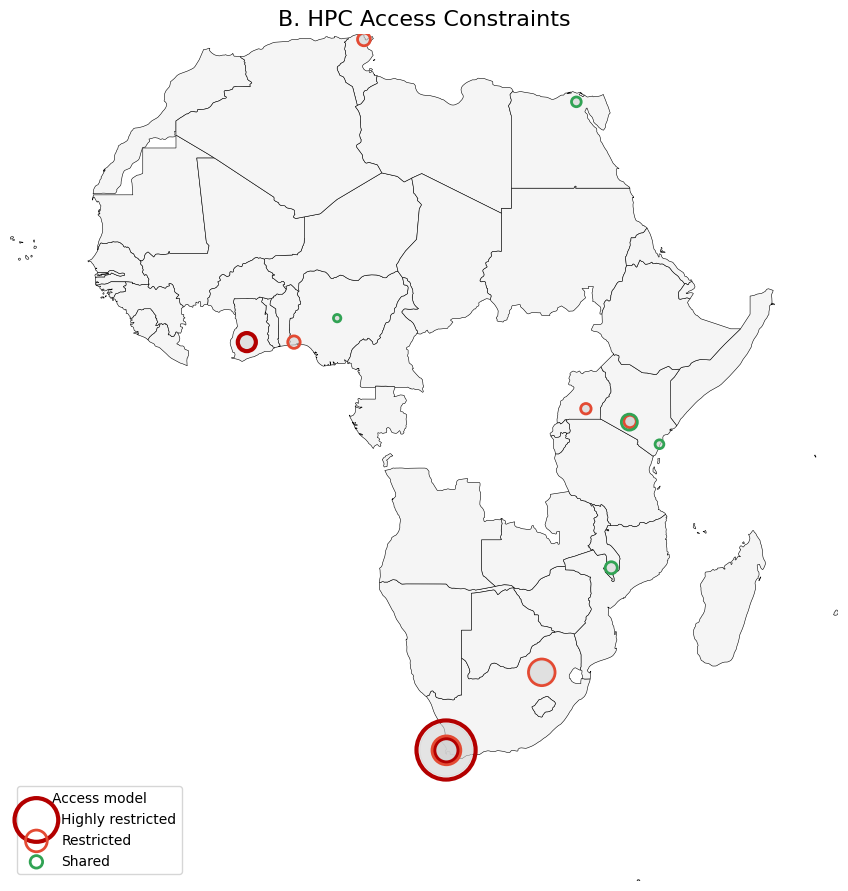

In [ ]:
# ---- ACCESS TIERS ----
access_map = {
    "ZA-Wits-Core": "Limited",
    "CHPC": "National / Project-based",
    "Ilifu": "Limited",
    "UCT HPC": "Institutional",
    "Discovery": "Institutional",
    "Virtual Lab - KENET": "Consortium",
    "Hpc01": "Project-based",
    "UVRI Bioinformatics Cluster": "Project-based",
    "PUBReC": "Collaborative",
    "Pathogens Biology": "Collaborative",
    "IPT": "Project-based",
    "CUBRe": "Project-based",
    "NABDA-CGRI": "Collaborative",
    "ECBAG-EGYPT": "Collaborative"
}

access_tier_map = {
    "National / Project-based": "Highly restricted",
    "Institutional": "Highly restricted",
    "Limited": "Restricted",
    "Project-based": "Restricted",
    "Consortium": "Shared",
    "Collaborative": "Shared"
}

gdf_points["access_model"] = gdf_points["name"].map(access_map)
gdf_points["access_tier"] = gdf_points["access_model"].map(access_tier_map)

# ---- VISUAL STYLES ----
access_style = {
    "Highly restricted": {"edgecolor": "#b30000", "linewidth": 3},
    "Restricted": {"edgecolor": "#e34a33", "linewidth": 2},
    "Shared": {"edgecolor": "#31a354", "linewidth": 2}
}

# ---- FIGURE ----
fig, ax2 = plt.subplots(figsize=(22, 11))

# =====================
# PANEL B: ACCESS
# =====================
africa.plot(
    ax=ax2,
    color="whitesmoke",
    edgecolor="black",
    linewidth=0.4
)

ax2.set_xlim(africa.total_bounds[[0, 2]])
ax2.set_ylim(africa.total_bounds[[1, 3]])

# Base capacity (neutral fill)
gdf_points.plot(
    ax=ax2,
    color="lightgrey",
    markersize=gdf_points["scaled_cores"] * 8,
    alpha=0.6,
    zorder=3
)

# Access rings
for tier, style in access_style.items():
    subset = gdf_points[gdf_points["access_tier"] == tier]
    subset.plot(
        ax=ax2,
        facecolor="none",
        markersize=subset["scaled_cores"] * 10,
        edgecolor=style["edgecolor"],
        linewidth=style["linewidth"],
        label=tier,
        zorder=5
    )

ax2.legend(
    title="Access model",
    loc="lower left",
    frameon=True
)

ax2.set_title("B. HPC Access Constraints", fontsize=16)
ax2.set_axis_off()

plt.show()

## Problem and proposal
Kenya's strengths are on strong networks, and infrastructures, but weaknesses on shared compute and underutilization. They also have active communities like bioinformatics communities with evidence of shared training. West african countries like Nigeria, and Ghana have multiple systems available, but have very small systems relative to demand, we assume.


## Co-designing for access

The current access protocols. This section summarises the existing access modes mentioned for the different HPCs. The forms, communication plans in place to request space, requirements and more.

Using these to inform co-designing of the framework. (come up with a report that we can share with our selected partners about communication that works or doesn't work in this work).


## Co-designing training
What type is training is required to ensure users are maximising the HPC use? So:
- Training to enable users to gauge what they need (if they actually need a HPC or can use a smaller system) in a HPC system.
- Writing a DMP that can be shared with the technical team as the project begins to use to determine their needs, and any changes, and sustain this for after the project is complete (can the data be reused by any other person coming in later using the same data)
- Writing metadata and documentation (for reuse of data and workflow in future with new users)
- Communicating errors or issues with the technical team
- Optimizing use of the space (to get the best output of their project)
- How best to use the HPC based on geographic location (based on what exists, their needs, and the collab framework)

The output will be a report to guide that can be used to design the best training material. This will be implemented to design these training materials for use with the selected cohort.   

So, co-design material with the system administrators, those who manage the system.

End users come in in the training part.

Strategy for approaching institutions to test the co-design framework.
